<a href="https://colab.research.google.com/github/JonathaCosta/3_SmartGrid/blob/main/AEL/AEL2_AnaliseEnergeticaLocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do potencial energético na cidade de Fortaleza no intervalo de 5 anos e previsão para ano seguinte

**Métodos utilizados**: 
*   Séries Temporais
*   *Machine Learning* 
*   Rede Neural Recorrente



## Etapa 01 - Análise de dados

Importar dados, tratar, converter em DataFrame e realizar análise prévia numérica e gráfica.

### Importação, tratamento e conversão


Fonte: https://tempo.inmet.gov.br/TabelaEstacoes/82397#

In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
''' Importa os dados de 2021-2017, atualiza o index para data e altera os nomes das colunas '''

dados = pd.concat([pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd1_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd2_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd3_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd4_fortaleza.xls'),
           pd.read_excel('/content/drive/MyDrive/JRC_research/Colab/BD/bd5_fortaleza.xls')])
dados = dados.set_index('Data')

dados.rename(columns={'Hora (UTC)':'hora', 'Temp. Ins. (C)':'tinst', 'Temp. Max. (C)': 'tmax', 'Temp. Min. (C)':'tmin',
       'Umi. Ins. (%)': 'uinst', 'Umi. Max. (%)':'umax', 'Umi. Min. (%)':'umin',
       'Pto Orvalho Ins. (C)':'poinst', 'Pto Orvalho Max. (C)':'pomax', 'Pto Orvalho Min. (C)':'pomin',
       'Pressao Ins. (hPa)':'pinst', 'Pressao Max. (hPa)':'pmax', 'Pressao Min. (hPa)':'pmin',
       'Vel. Vento (m/s)':'velven', 'Dir. Vento (m/s)':'dirven', 'Raj. Vento (m/s)':'rajven',
       'Radiacao (KJ/m²)':'radiacao', 'Chuva (mm)':'chuva'},inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2017-01-01 to 2021-12-31
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      43824 non-null  int64  
 1   tinst     39306 non-null  float64
 2   tmax      39301 non-null  float64
 3   tmin      39301 non-null  float64
 4   uinst     39306 non-null  float64
 5   umax      39301 non-null  float64
 6   umin      39301 non-null  float64
 7   poinst    39306 non-null  float64
 8   pomax     39301 non-null  float64
 9   pomin     39301 non-null  float64
 10  pinst     39306 non-null  float64
 11  pmax      39301 non-null  float64
 12  pmin      39301 non-null  float64
 13  velven    39306 non-null  float64
 14  dirven    39306 non-null  float64
 15  rajven    39298 non-null  float64
 16  radiacao  21808 non-null  float64
 17  chuva     36866 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 6.4 MB


### Análise prévia dos dados

Medição total de radiação diária, semanal, mensal e anual para o intervalo de 5 anos


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2017-01-01 to 2021-12-31
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hora      43824 non-null  int64  
 1   tinst     39306 non-null  float64
 2   tmax      39301 non-null  float64
 3   tmin      39301 non-null  float64
 4   uinst     39306 non-null  float64
 5   umax      39301 non-null  float64
 6   umin      39301 non-null  float64
 7   poinst    39306 non-null  float64
 8   pomax     39301 non-null  float64
 9   pomin     39301 non-null  float64
 10  pinst     39306 non-null  float64
 11  pmax      39301 non-null  float64
 12  pmin      39301 non-null  float64
 13  velven    39306 non-null  float64
 14  dirven    39306 non-null  float64
 15  rajven    39298 non-null  float64
 16  radiacao  21808 non-null  float64
 17  chuva     36866 non-null  float64
dtypes: float64(17), int64(1)
memory usage: 6.4 MB


In [ ]:
dados.head()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2017-01-01,0,27.6,27.7,27.6,71.0,72.0,71.0,21.9,22.2,21.9,1009.0,1009.0,1008.5,2.1,104.0,5.9,NaN,0.0
2017-01-01,100,27.5,27.7,27.5,72.0,72.0,71.0,22.1,22.1,21.9,1009.1,1009.1,1009.0,2.3,101.0,6.9,NaN,0.0
2017-01-01,200,27.4,27.6,27.3,75.0,75.0,72.0,22.6,22.6,22.1,1009.1,1009.2,1009.0,2.6,107.0,6.9,NaN,0.0
2017-01-01,300,27.4,27.4,27.3,76.0,76.0,75.0,22.8,22.8,22.5,1008.7,1009.1,1008.6,3.2,105.0,7.0,NaN,0.0
2017-01-01,400,27.1,27.4,27.1,76.0,77.0,76.0,22.6,22.8,22.6,1007.8,1008.7,1007.8,2.2,105.0,7.0,NaN,0.0


In [ ]:
dados.describe()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
count,43824.000000,39306.000000,39301.000000,39301.000000,39306.000000,39301.000000,39301.000000,39306.000000,39301.000000,39301.000000,39306.000000,39301.000000,39301.000000,39306.000000,39306.00000,39298.000000,21808.000000,36866.000000
mean,1150.000000,27.258622,27.756698,26.796272,71.917494,74.147757,69.563650,21.461197,21.900300,21.035824,1009.513168,1009.766594,1009.262334,2.408429,124.35824,6.392791,1148.049086,0.183812
std,692.226553,2.282757,2.467363,2.101413,12.652370,11.735372,13.461112,1.617304,1.524072,1.736674,1.972535,1.959772,1.965786,1.378433,42.12052,2.834856,923.888322,1.350263
min,0.000000,20.600000,20.900000,20.400000,29.000000,32.000000,27.000000,11.100000,13.200000,10.700000,1002.500000,1002.700000,1002.400000,0.000000,1.00000,0.000000,0.010000,0.000000
25%,575.000000,25.600000,26.000000,25.300000,63.000000,66.000000,59.000000,20.600000,21.100000,20.100000,1008.100000,1008.400000,1007.800000,1.400000,98.00000,4.300000,188.725000,0.000000
50%,1150.000000,26.900000,27.200000,26.500000,74.000000,76.000000,72.000000,21.700000,22.100000,21.400000,1009.400000,1009.700000,1009.200000,2.400000,110.00000,6.600000,1061.125000,0.000000
75%,1725.000000,29.100000,29.900000,28.300000,81.000000,83.000000,78.000000,22.600000,23.000000,22.300000,1010.800000,1011.100000,1010.600000,3.400000,151.00000,8.500000,1937.007500,0.000000
max,2300.000000,33.600000,34.500000,32.900000,93.000000,93.000000,93.000000,26.100000,26.800000,25.100000,1016.600000,1016.800000,1016.600000,7.000000,360.00000,15.900000,3239.200000,50.800000


### Meses de maior concentração de radiação e chuva nos últimos 5 anos

Text(0.5, 1.0, 'Dispersão de Radiação mensal acumulada em 5 anos')

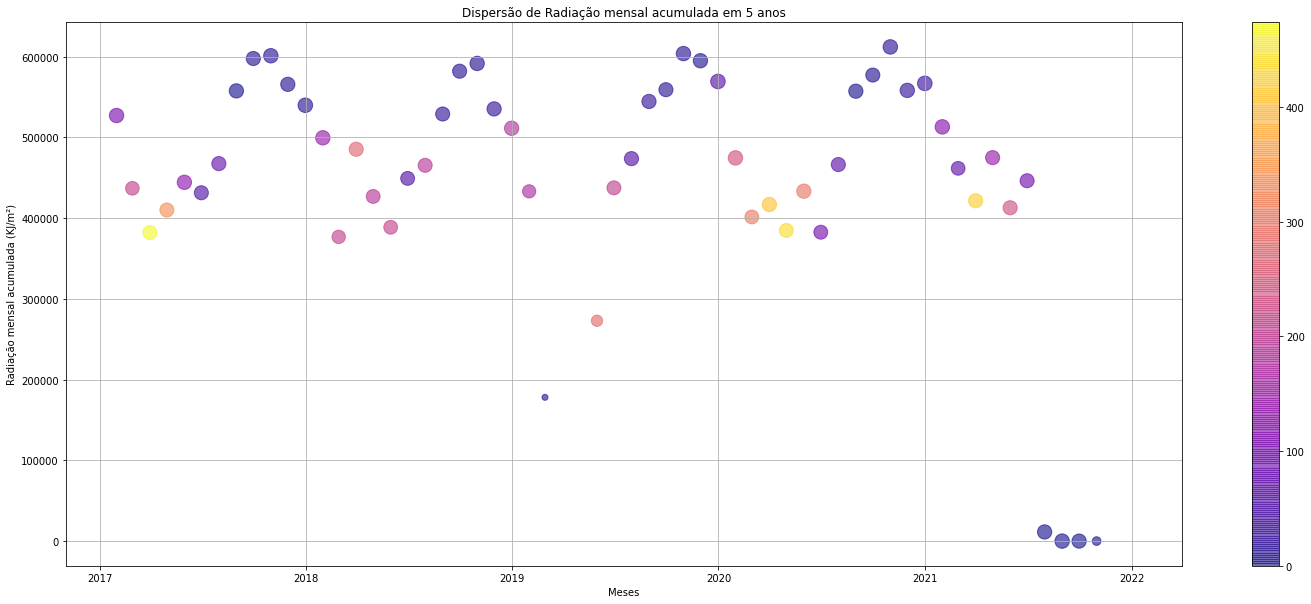

In [ ]:
mes_df = dados.resample('M').sum()

plt.figure(figsize=(25,10))
plt.scatter(mes_df.index,mes_df.radiacao, c = mes_df.chuva, cmap='plasma', s = mes_df.tmax/1e2, alpha=0.6 )
plt.colorbar()
plt.grid()
plt.xlabel('Meses')
plt.ylabel('Radiação mensal acumulada (KJ/m²)')
plt.title('Dispersão de Radiação mensal acumulada em 5 anos')

### Meses de concentração de radiação - maior e menor

In [ ]:
mes_df.tail()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2021-08-31,855600,20476.7,20855.3,20131.7,48052.0,49801.0,46247.0,14820.9,15154.1,14486.8,752038.8,752236.9,751852.5,2353.2,89768.0,5923.8,0.0,0.0
2021-09-30,828000,19894.2,20253.7,19566.3,46941.0,48506.0,45201.0,14689.0,14983.7,14362.5,721379.3,721567.9,721190.1,2351.4,78920.0,5803.1,0.0,0.0
2021-10-31,855600,7422.8,7555.7,7295.7,17661.0,18287.0,17012.0,5584.5,5699.2,5460.8,266231.2,266301.3,266160.9,862.0,27815.0,2125.1,0.0,0.0
2021-11-30,828000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31,855600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Meses de menor concentração de radiação')

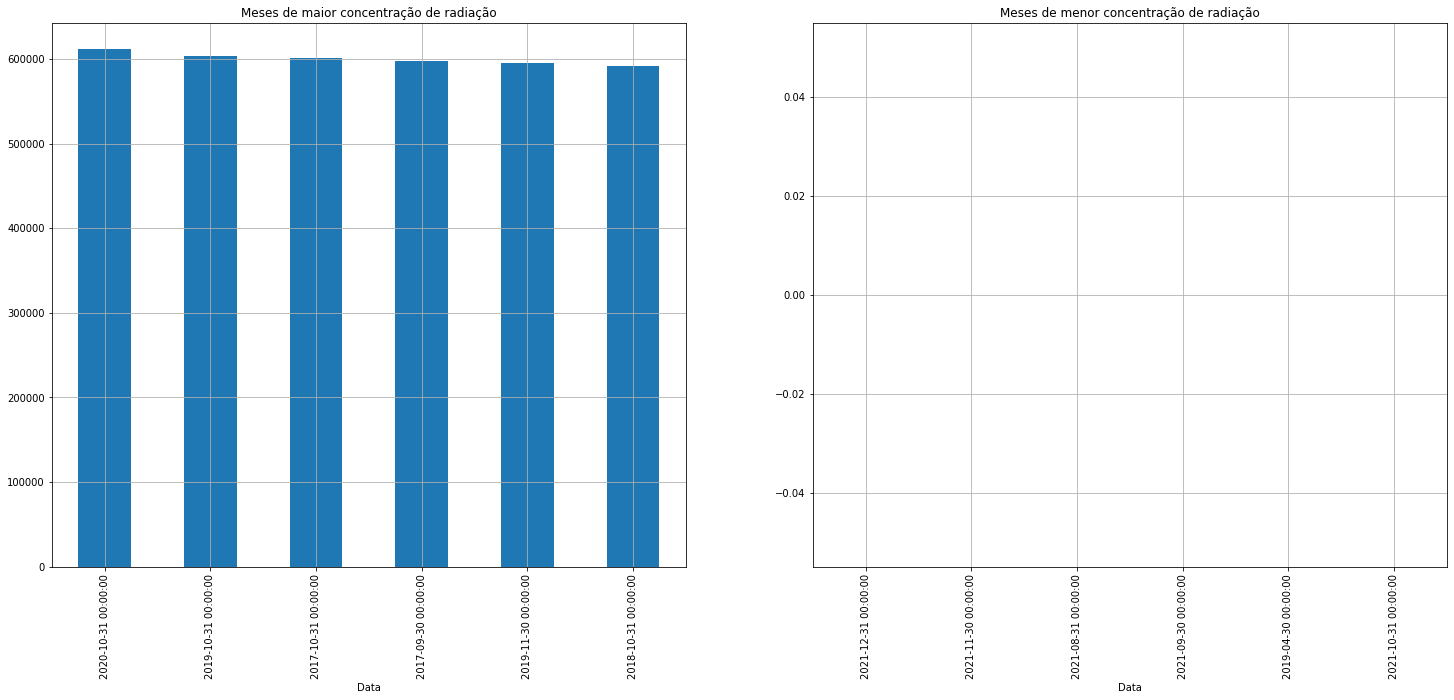

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
maior = mes_df.radiacao.sort_values(ascending=False).head(6)
maior.plot(kind='bar')
plt.grid()
plt.title('Meses de maior concentração de radiação')

plt.subplot(1,2,2)
menor = mes_df.radiacao.sort_values(ascending=True).head(6)
menor.plot(kind='bar')
plt.grid()
plt.title('Meses de menor concentração de radiação')


### Distribuição das frequências

Text(0, 0.5, 'Ocorrências')

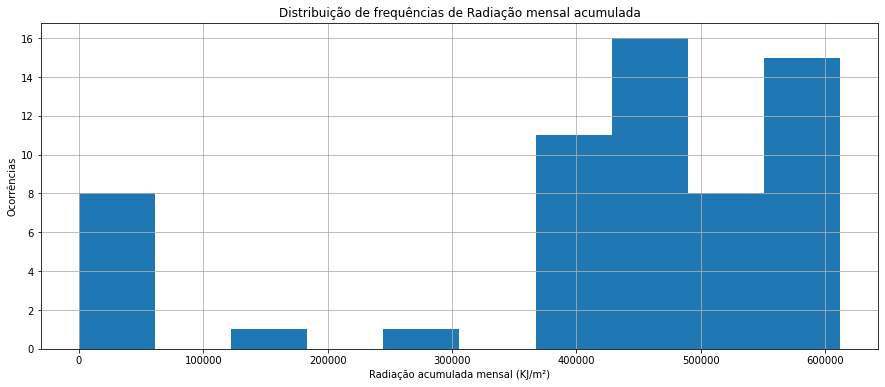

In [ ]:
plt.figure(figsize=(15,6))
mes_df.radiacao.hist()
plt.title('Distribuição de frequências de Radiação mensal acumulada')
plt.xlabel('Radiação acumulada mensal (KJ/m²)')
plt.ylabel('Ocorrências')

### Análise gráfica da radiação no quinquênio (2017-2021)

In [ ]:
def AnaliseRadiacao(df):
  period = {'D':'diário','W':'semanal','M':'mensal','Y':'anual'}
  plt.figure(figsize=(30,10))

  for i,j in enumerate(period):
    a = df.resample(j).radiacao.sum()/1e3
    plt.subplot(2,2,i+1)
    a.plot()
    plt.ylabel('MJ/m²')
    plt.title('Período '+ period[j])
    plt.grid()
    

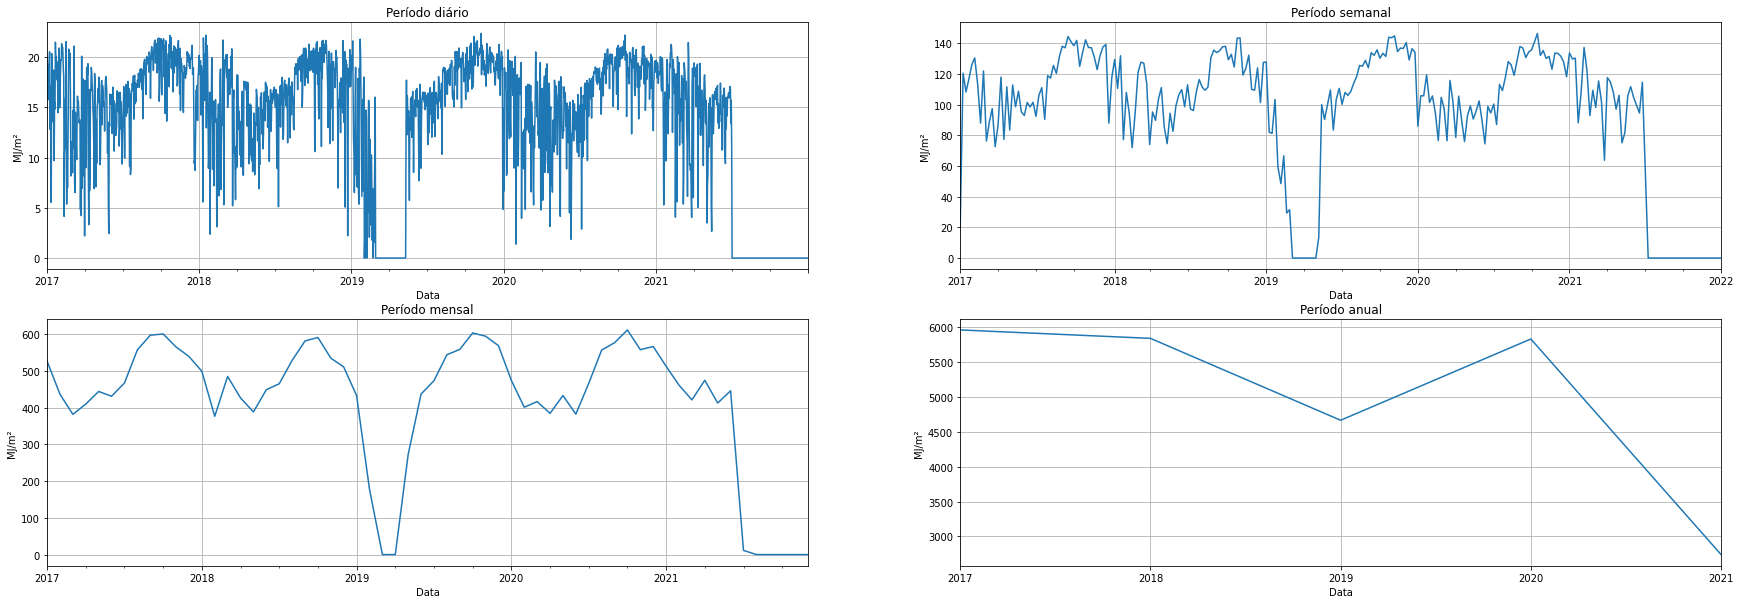

In [ ]:
AnaliseRadiacao(dados)

# Análise pontual de 2020

O filtro do índice de ano no formato data pode ser feito via:


*   df.loc['2020-01-01':'2020-12-31']

*   import datetime 
    df.loc[datetime.date(year=2020,month=1,day=1) : datetime.date(year=2020,month=12,day=31)]

*    df.loc['2020-01-01':'2020-12-31'] 

*    df.query('20200101 < Data < 20201231')


In [ ]:
df1 = df.loc['2020-01-01':'2020-12-31']
df1.head()

,hora,tinst,tmax,tmin,uinst,umax,umin,poinst,pomax,pomin,pinst,pmax,pmin,velven,dirven,rajven,radiacao,chuva
Data,,,,,,,,,,,,,,,,,,
2020-01-31,855600,20544.5,20916.3,20204.2,56558.0,58152.0,54865.0,16984.5,17322.9,16673.2,750473.1,750662.5,750282.9,1315.9,85179.0,3687.5,474487.07,237.8
2020-02-29,800400,18782.3,19129.4,18458.3,55896.0,57319.0,54425.0,16125.7,16455.3,15839.4,701047.2,701236.8,700862.4,960.7,93965.0,2955.0,401359.24,308.6
2020-03-31,855600,20219.1,20613.8,19871.7,59825.0,61375.0,58073.0,17349.7,17680.4,17049.8,750235.4,750456.3,750022.0,869.0,111443.0,2714.0,416760.85,408.6
2020-04-30,828000,19376.4,19726.4,19054.5,58465.0,59891.0,56932.0,16760.7,17085.0,16469.1,724362.7,724570.5,724158.3,935.8,115188.0,2929.1,384641.63,439.0
2020-05-31,855600,20085.4,20442.8,19746.6,58404.0,59994.0,56682.0,16905.9,17232.8,16591.4,750342.0,750525.7,750158.3,1220.5,110897.0,3516.9,433268.32,298.4


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


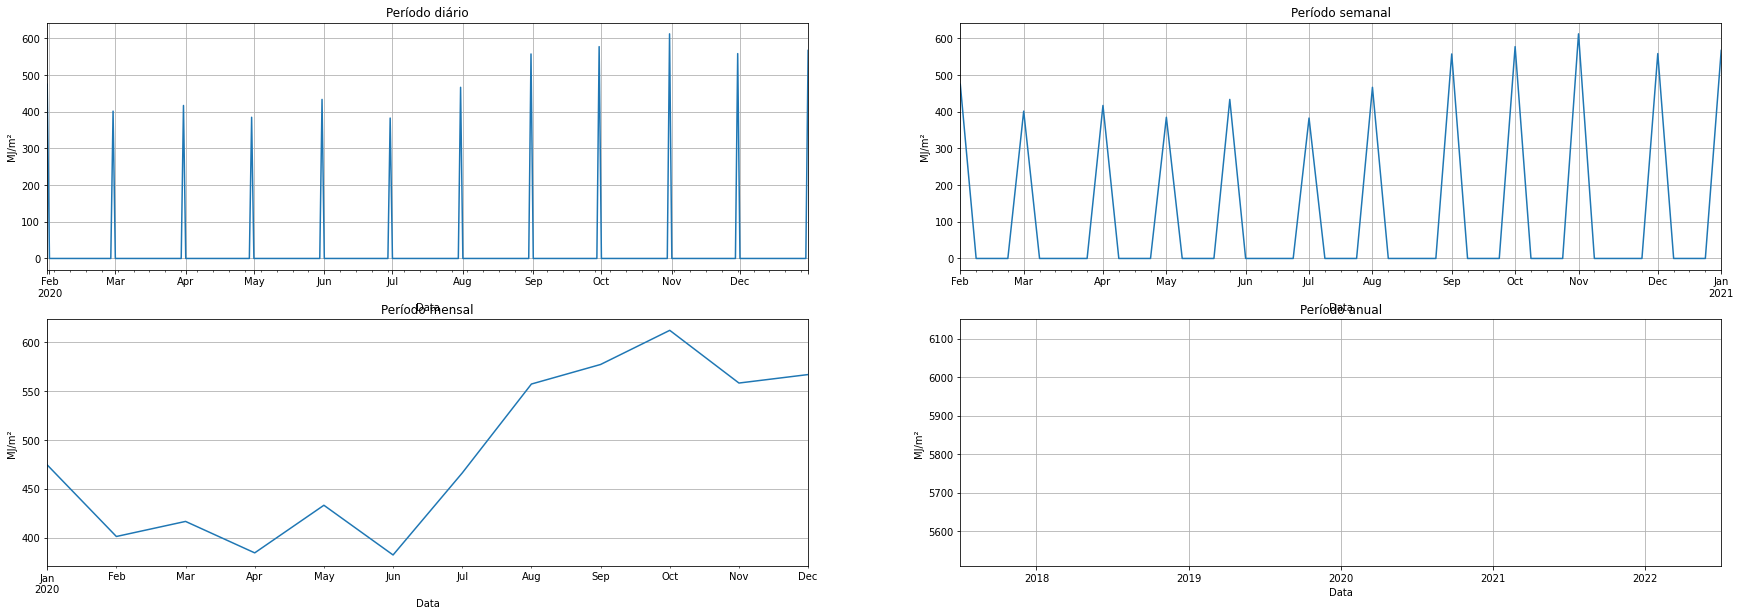

In [ ]:
AnaliseRadiacao(df1)

Text(0.5, 1.0, 'Análise gráfica: Umidade, temperatura, ventos e chuva')

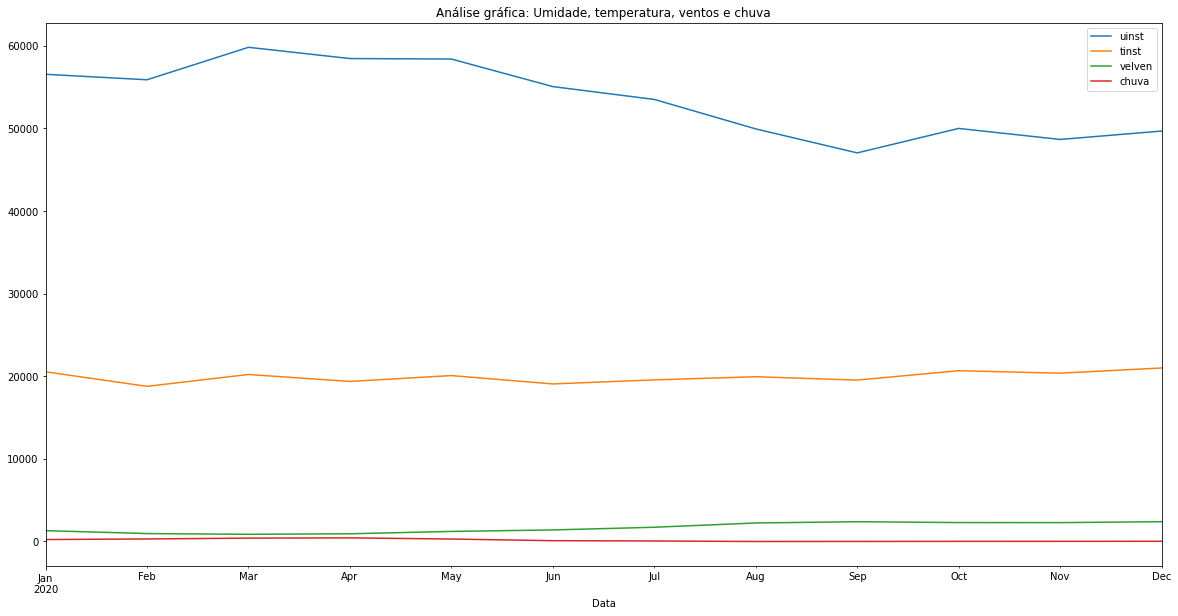

In [ ]:
df2 = df1.loc[:,['uinst','tinst','velven','chuva']]
df2.plot(figsize=(20,10))
plt.title('Análise gráfica: Umidade, temperatura, ventos e chuva')

## Correlação entre variáveis

### Correlação direta entre as variáveis: Umidade instantânea, Temperatura 
instantânea, Velocidade do vento e chuva.

df2 é um DataFrame referente ao ano de 2020.

In [ ]:
df2.corr()

,uinst,tinst,velven,chuva
uinst,1.000000,-0.269316,-0.962993,0.917369
tinst,-0.269316,1.000000,0.467373,-0.281346
velven,-0.962993,0.467373,1.000000,-0.931619
chuva,0.917369,-0.281346,-0.931619,1.000000


# ***RESPOSTAS***
Resposta à primeira provocação:
Correlação entre : 
* Radiação, chuva e ventos
* Umidade, a temperatura e a radiação?
* Umidade e os ventos e a temperatura?

In [ ]:
df1[['radiacao','chuva','velven']].corr()


,radiacao,chuva,velven
radiacao,1.000000,-0.792968,0.931887
chuva,-0.792968,1.000000,-0.931619
velven,0.931887,-0.931619,1.000000


In [ ]:
df1[['radiacao','uinst','tinst']].corr()

,radiacao,uinst,tinst
radiacao,1.000000,-0.877464,0.628965
uinst,-0.877464,1.000000,-0.269316
tinst,0.628965,-0.269316,1.000000


In [ ]:
df1[['velven','uinst','tinst']].corr()

,velven,uinst,tinst
velven,1.000000,-0.962993,0.467373
uinst,-0.962993,1.000000,-0.269316
tinst,0.467373,-0.269316,1.000000


In [ ]:
df1[['radiacao','chuva','velven','tinst','uinst']].corr()


,radiacao,chuva,velven,tinst,uinst
radiacao,1.000000,-0.792968,0.931887,0.628965,-0.877464
chuva,-0.792968,1.000000,-0.931619,-0.281346,0.917369
velven,0.931887,-0.931619,1.000000,0.467373,-0.962993
tinst,0.628965,-0.281346,0.467373,1.000000,-0.269316
uinst,-0.877464,0.917369,-0.962993,-0.269316,1.000000


# Meses de maior elevação de temperatura


df1 é referente ao ano 2020

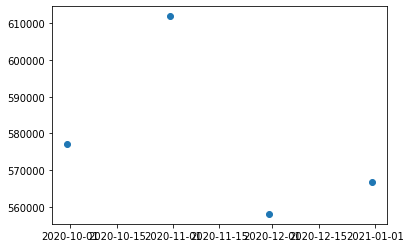

In [ ]:
maiores = df1.sort_values(by='radiacao',ascending=False).head(4).copy()
plt.scatter(maiores.index, maiores.radiacao)